In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [6]:
test_path = 'Z:\\Sasindu\\Data set\\Insurance\\test.csv'
train_path = 'Z:\\Sasindu\\Data set\\Insurance\\train.csv'

In [7]:
test_set = pd.read_csv(test_path)
train_set = pd.read_csv(train_path)

In [8]:
test_df = pd.DataFrame(test_set)
train_df = pd.DataFrame(train_set)

In [9]:
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [10]:
print('Shape of train dataset -->',train_df.shape)
print('Shape of test dataset -->',test_df.shape)

Shape of train dataset --> (1200000, 21)
Shape of test dataset --> (800000, 20)


## Checking Null Values and data types

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [12]:
train_df.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [13]:
test_df.isnull().sum()

id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type                  0
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Policy Start Date            0
Customer Feedback        52276
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

## EDA

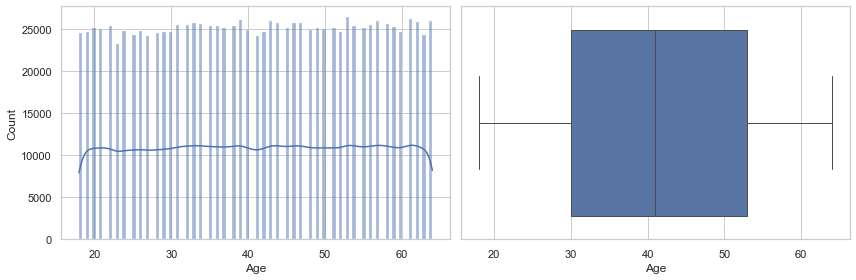

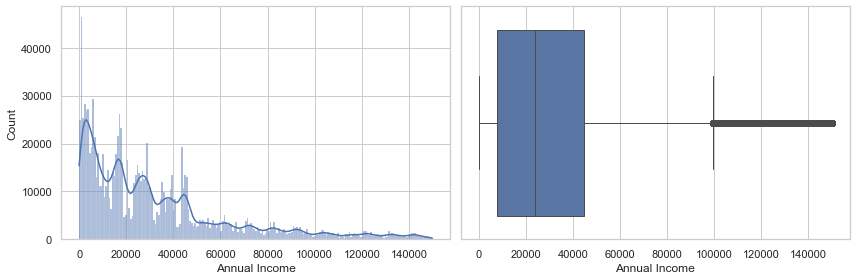

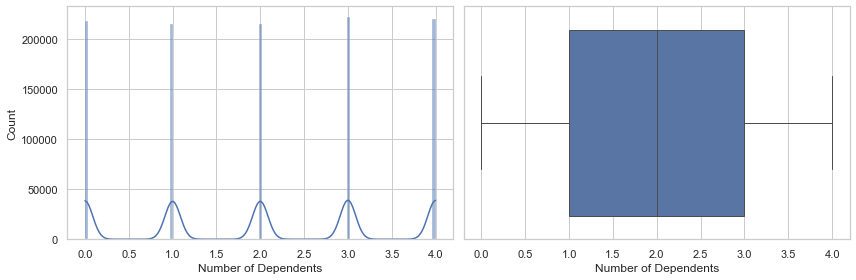

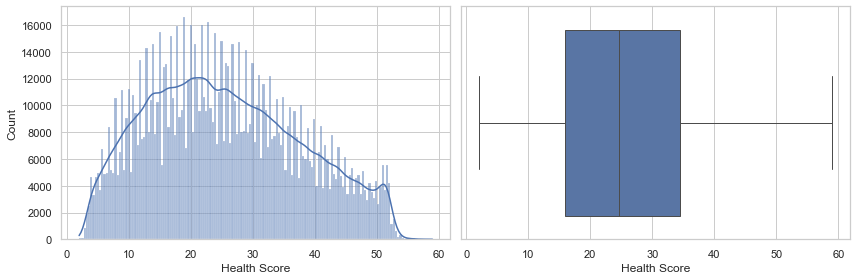

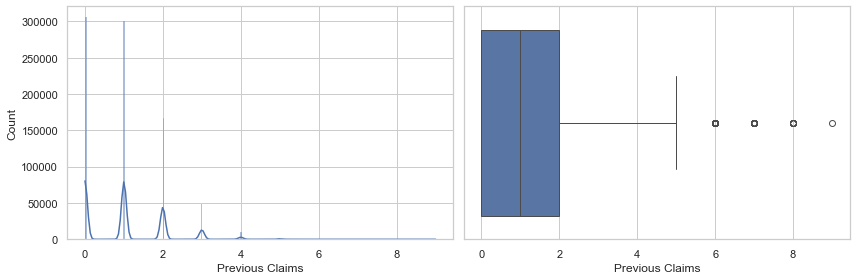

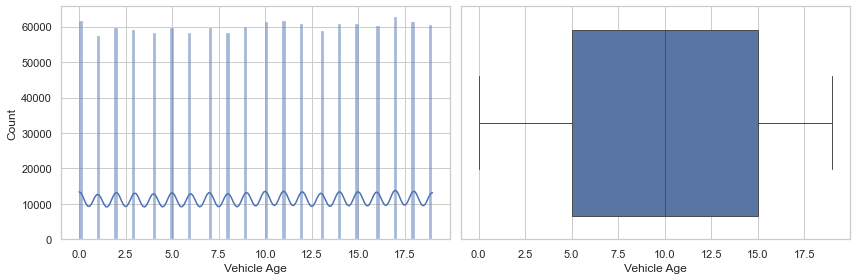

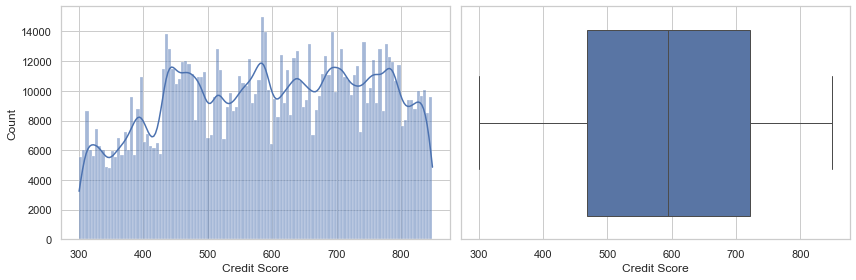

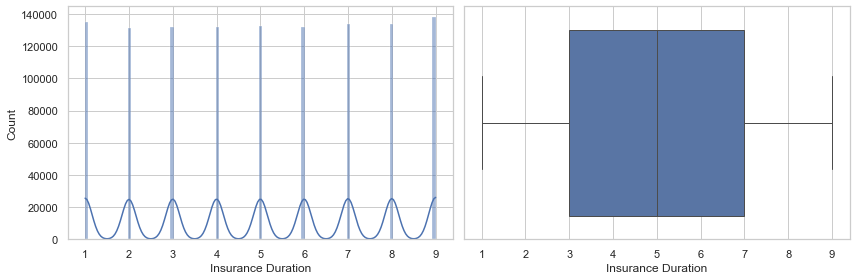

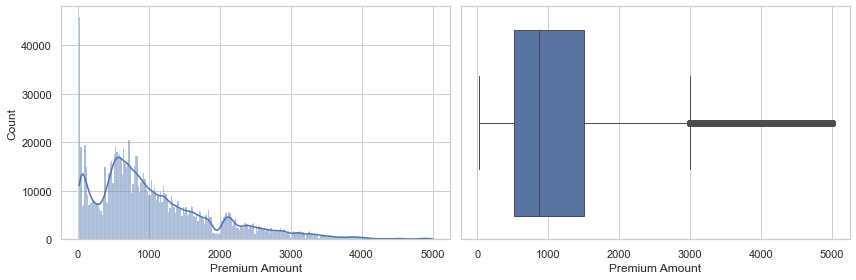

In [14]:
sns.set(style="whitegrid")
numeric_columns = train_df.select_dtypes(include=['number']).columns
numeric_columns_without_id = [col for col in numeric_columns if col != 'id']

for col in numeric_columns_without_id:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_df[col])
    plt.tight_layout()
    plt.show()

### Distribution of Annual Income with Gender

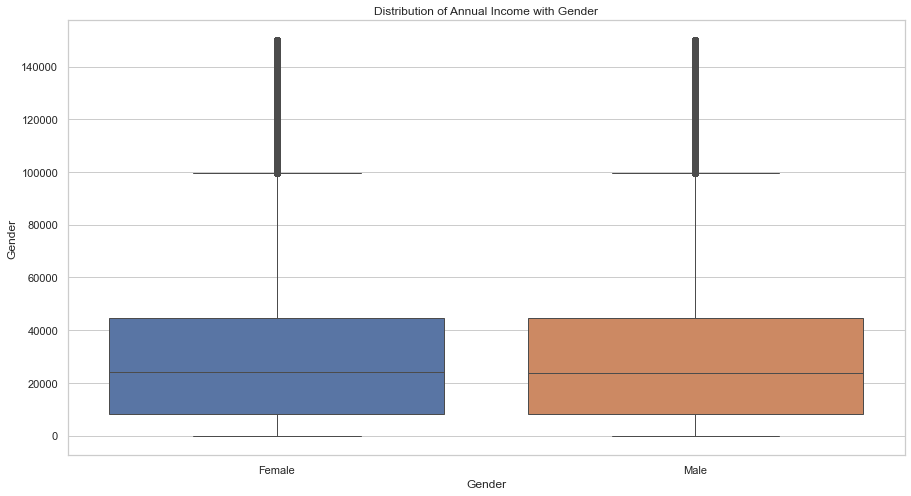

In [15]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Gender' , y='Annual Income',data = train_df, hue = 'Gender')
plt.ylabel("Gender")
plt.title('Distribution of Annual Income with Gender')
plt.show()

### Distribution of Annual Income with Education Level

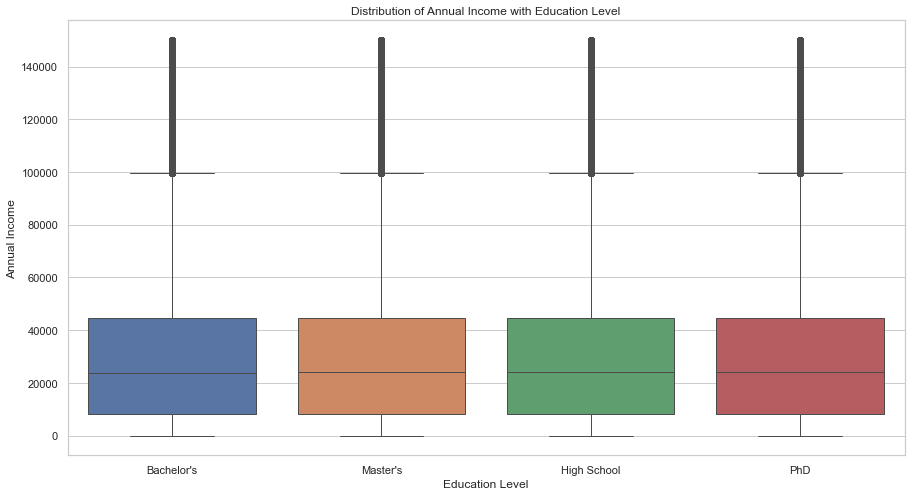

In [16]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Education Level' ,y='Annual Income',data = train_df,hue ='Education Level')
plt.title('Distribution of Annual Income with Education Level')
plt.show()

### Distribution of Annual Income with Location

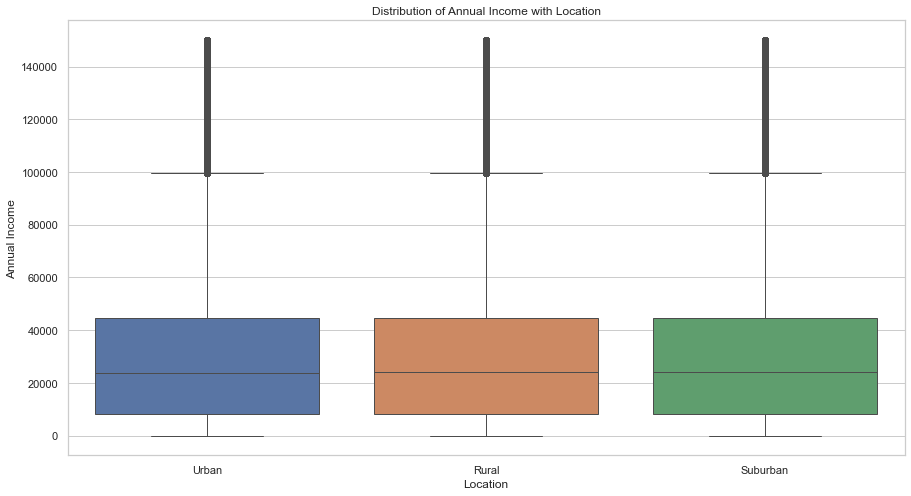

In [17]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Location' ,y='Annual Income',data = train_df,hue ='Location')
plt.title('Distribution of Annual Income with Location')
plt.show()

### Distribution of Health Score with Gender

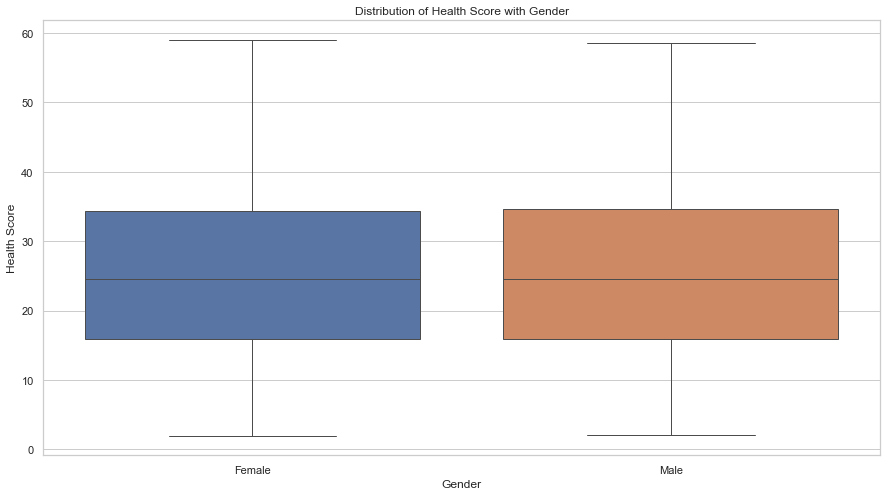

In [18]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Gender' ,y='Health Score',data = train_df,hue ='Gender')
plt.title('Distribution of Health Score with Gender')
plt.show()

### Distribution of Health Score with Occupation

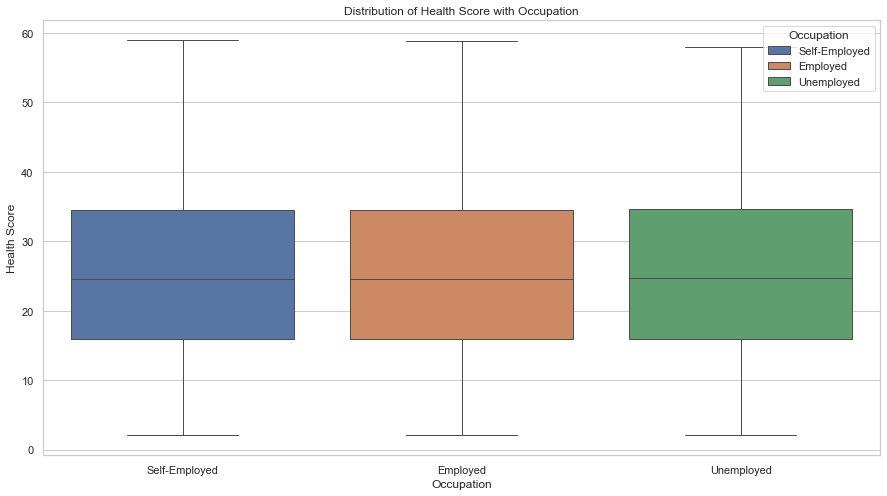

In [19]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Occupation' ,y='Health Score',data = train_df,hue ='Occupation')
plt.title('Distribution of Health Score with Occupation')
plt.show()

### Distribution of Health Score with Location

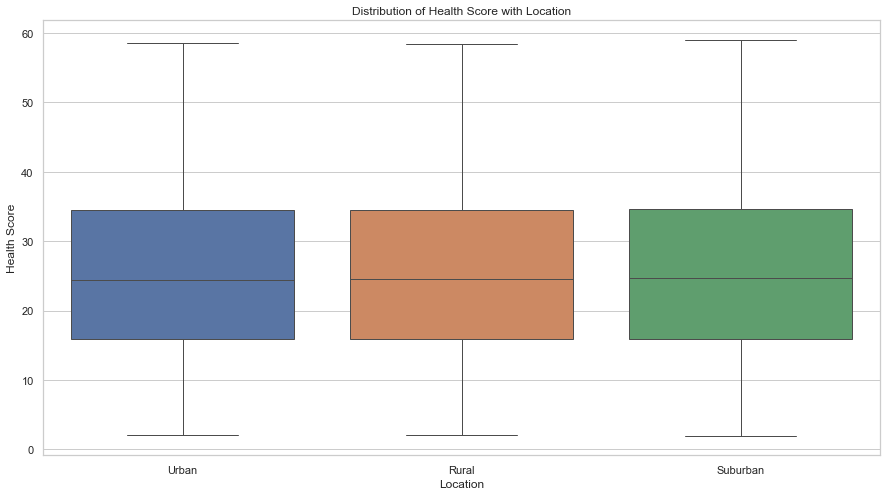

In [20]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Location' ,y='Health Score',data = train_df,hue ='Location')
plt.title('Distribution of Health Score with Location')
plt.show()

### EDA For categorical columns

In [21]:
categorical_columns = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type']

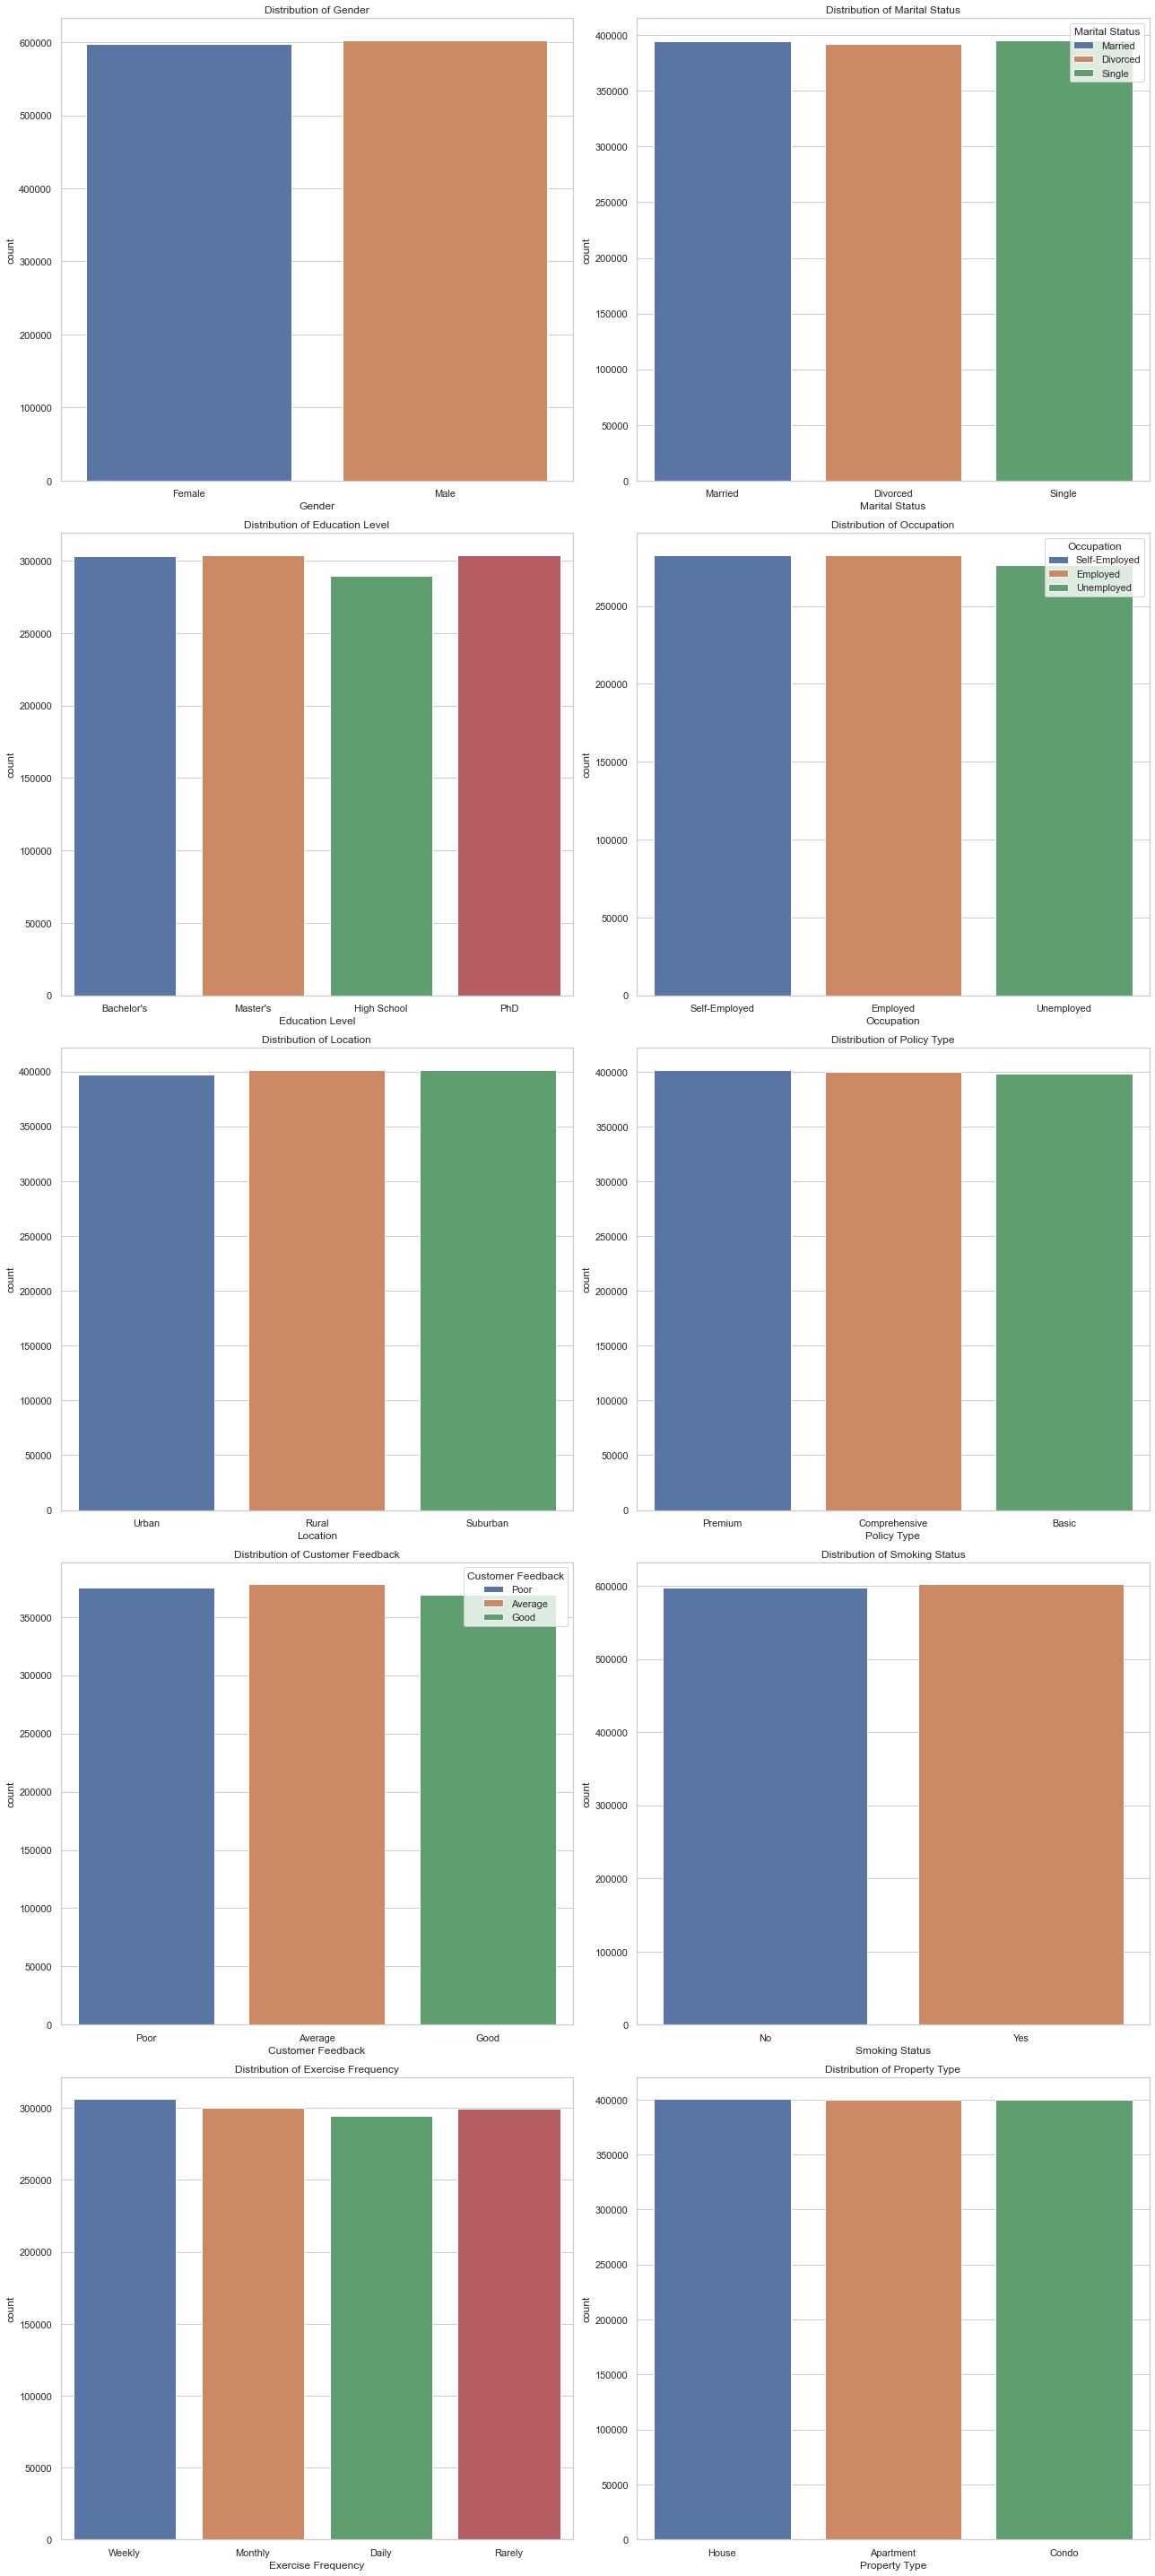

In [22]:
plt.figure(figsize=(18,40))
for i,column in enumerate(categorical_columns, 1):
    plt.subplot(5,2,i)
    sns.countplot(x=column, data=train_df, hue = column)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

## Fill null values of Numerical Columns

### Fill Null values of Age column, and Number of Dependents.

#### According to Histograms and boxplots, Age , Number of Dependents columns has uniform distribution. Hance , I dicided to fill null values of those variables randomly which values in it's range.

In [23]:
def random_fill_null(df,var):
    non_null = df[var].dropna()
    df[var] = df[var].apply(lambda x: np.random.choice(non_null) if pd.isna(x) else x)

In [24]:
random_fill_null(test_df,'Age')
random_fill_null(train_df,'Age')

In [25]:
random_fill_null(test_df,'Number of Dependents')
random_fill_null(train_df,'Number of Dependents')

### Fill Null values of Annual Income, Previous Claims, Credit Score, and Insurance Duration column

#### According to Histograms and boxplots, mentioned columns has skewed distribution. Hence, null values were filled using median.

In [26]:
def median_fill_null(df,var):
    median_value = df[var].median()
    df[var] = df[var].fillna(median_value)

In [27]:
median_fill_null(train_df,'Annual Income')
median_fill_null(test_df,'Annual Income')

In [28]:
median_fill_null(train_df,'Previous Claims')
median_fill_null(test_df,'Previous Claims')

In [29]:
median_fill_null(train_df,'Credit Score')
median_fill_null(test_df,'Credit Score')

In [30]:
median_fill_null(train_df,'Insurance Duration')
median_fill_null(test_df,'Insurance Duration')

### Fill Null values of Health Score, and Vehicle Age column

#### Above mentioned variables are normally distributed. Hence, those null values were filled using the Mean.

In [31]:
def mean_fill_null(df,var):
    mean_value = df[var].mean()
    df[var] = df[var].fillna(mean_value)

In [32]:
mean_fill_null(train_df,'Health Score')
mean_fill_null(test_df,'Health Score')

In [33]:
mean_fill_null(train_df,'Vehicle Age')
mean_fill_null(test_df,'Vehicle Age')

## Fill Null values of Categorical Columns

#### Because of having lot of missing values, Unknown data is allocated to new category as unknown.

In [34]:
categorical_columns = ['Occupation','Marital Status','Customer Feedback']

def fill_catogory(df):
    for column in categorical_columns:
        df[column] = df[column].astype('category')
        df[column] = df[column].cat.add_categories(['Unknown'])
        df[column] = df[column].fillna('Unknown')

In [35]:
fill_catogory(train_df)
fill_catogory(test_df)

In [36]:
train_df.isnull().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

In [37]:
test_df.isnull().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
dtype: int64

#### All the null values have filled.

### Check number of unique values in each column.

In [38]:
for col in train_df.columns:
    print(col,'---->',train_df[col].nunique())

id ----> 1200000
Age ----> 47
Gender ----> 2
Annual Income ----> 88593
Marital Status ----> 4
Number of Dependents ----> 5
Education Level ----> 4
Occupation ----> 4
Health Score ----> 532658
Location ----> 3
Policy Type ----> 3
Previous Claims ----> 10
Vehicle Age ----> 21
Credit Score ----> 550
Insurance Duration ----> 9
Policy Start Date ----> 167381
Customer Feedback ----> 4
Smoking Status ----> 2
Exercise Frequency ----> 4
Property Type ----> 3
Premium Amount ----> 4794


## Checking for Linear Relationship with Premium Amount

In [39]:
numeric_df = train_df.select_dtypes(include = ['number'])
corr_matrix = numeric_df.corr()

In [40]:
print(corr_matrix['Premium Amount'].sort_values(ascending = False).to_string())

Premium Amount          1.000000
Previous Claims         0.039394
Health Score            0.014326
Vehicle Age             0.000391
Insurance Duration     -0.000028
id                     -0.000292
Number of Dependents   -0.001111
Age                    -0.002440
Annual Income          -0.009989
Credit Score           -0.024471


### Checking for Multicolinearity

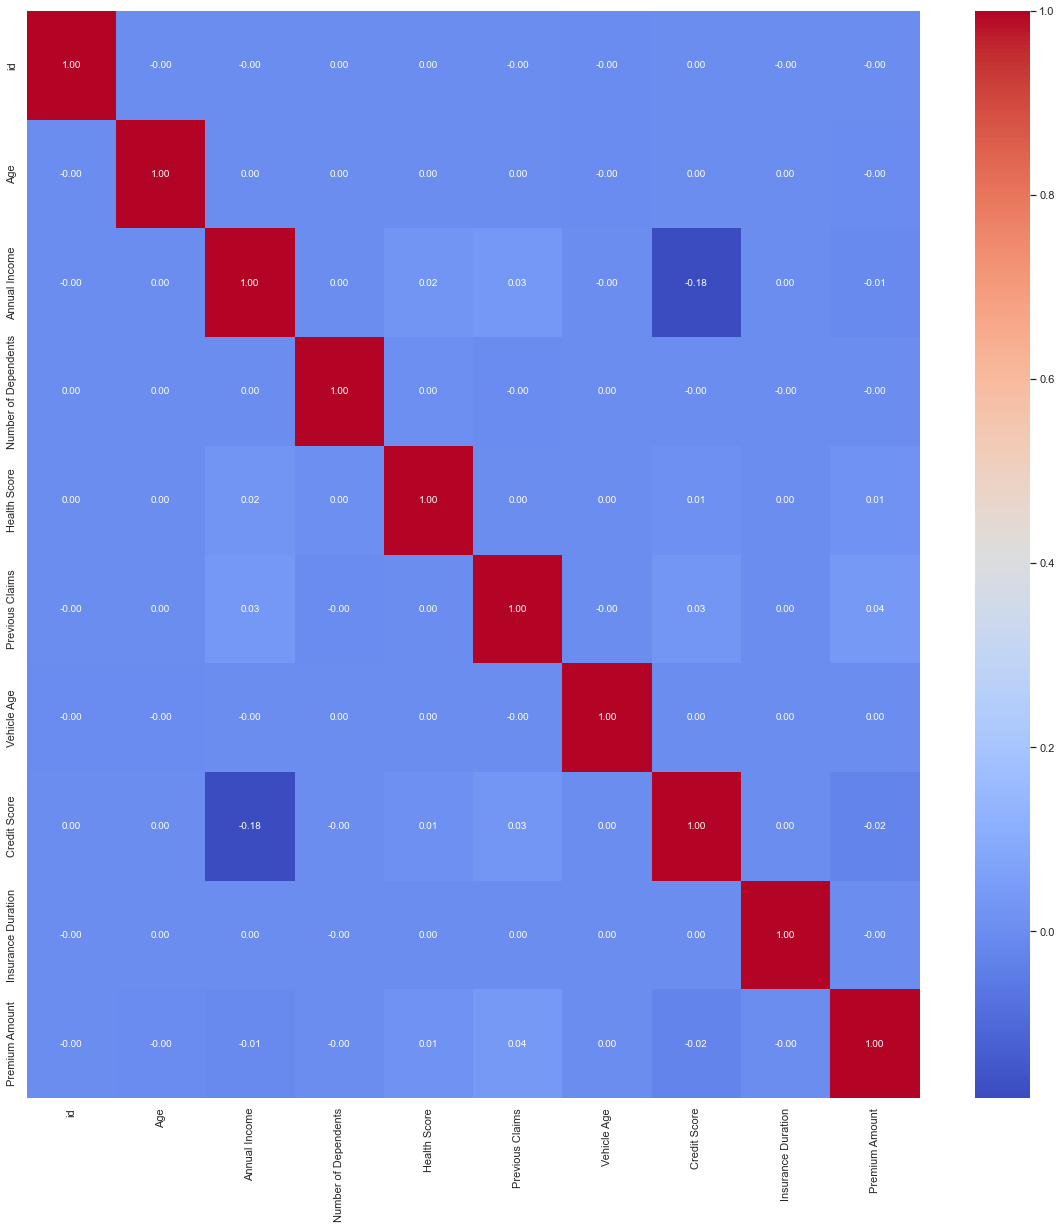

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,cmap = 'coolwarm', fmt = ".2f")
plt.show()

#### Here, All the correlation values are very low. So we can conclude that there is no strong linear relationship among variables. Hence, Multicollinearity cannot be identified.

## Feature Engineering

### One hot Encording for Categorical Variables

#### One-hot encoding is used to convert categorical data into a numerical format, making it easier for machine learning models to process.Categorical variables often have no inherent order. For instance, the categories "red", "green", and "blue" don’t have a meaningful numeric order, so simply assigning numbers (e.g., 1, 2, 3) could mislead the model into thinking there’s some kind of ordinal relationship. One-hot encoding avoids this issue by representing each category with a binary vector.

In [42]:
train_df_encoded = pd.get_dummies(train_df, 
                                  columns=['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
                                           'Policy Type', 'Customer Feedback','Smoking Status',
                                           'Exercise Frequency', 'Property Type'],
                                  drop_first=False)

In [43]:
test_df_encoded = pd.get_dummies(test_df, 
                                  columns=['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
                                           'Policy Type', 'Customer Feedback','Smoking Status',
                                           'Exercise Frequency', 'Property Type'],
                                  drop_first=False)

In [44]:
train_df_encoded.shape

(1200000, 44)

In [45]:
test_df_encoded.shape

(800000, 43)

In [46]:
train_df_encoded.columns

Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Policy Start Date', 'Premium Amount', 'Gender_Female', 'Gender_Male',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Marital Status_Unknown',
       'Education Level_Bachelor's', 'Education Level_High School',
       'Education Level_Master's', 'Education Level_PhD',
       'Occupation_Employed', 'Occupation_Self-Employed',
       'Occupation_Unemployed', 'Occupation_Unknown', 'Location_Rural',
       'Location_Suburban', 'Location_Urban', 'Policy Type_Basic',
       'Policy Type_Comprehensive', 'Policy Type_Premium',
       'Customer Feedback_Average', 'Customer Feedback_Good',
       'Customer Feedback_Poor', 'Customer Feedback_Unknown',
       'Smoking Status_No', 'Smoking Status_Yes', 'Exercise Frequency_Daily',
       'Exercise Frequency_Monthly', 'Exercise Frequency_Rarely'

### Create Features on Policy Start Date

In [47]:
import datetime

In [48]:
def date_encode(df_encoded):
    df_encoded['Policy Start Date'] = pd.to_datetime(df_encoded['Policy Start Date'], errors='coerce')
    df_encoded['Year'] = df_encoded['Policy Start Date'].dt.year
    df_encoded['Month'] = df_encoded['Policy Start Date'].dt.month
    df_encoded['WEEK_OF_YEAR'] = df_encoded['Policy Start Date'].dt.isocalendar().week

In [49]:
date_encode(train_df_encoded)
date_encode(test_df_encoded)

### Transform Date features into sin and cosine

#### Typically, Date features such as month, week of year are cyclical. To transform this feature to numeric value. Data scientists use sine, and cosine transformations. Here, I have transformed month and week of year features into sine and cosine.

In [50]:
def periodic_transform(dff,variable):
    dff[f"{variable}_SIN"] = np.sin(dff[variable] / dff[variable].max()*2*np.pi)
    dff[f"{variable}_COS"] = np.cos(dff[variable] / dff[variable].max()*2*np.pi)
    return dff

In [51]:
cyclic_col = ['Month','WEEK_OF_YEAR']

for col in cyclic_col:
    df_N = periodic_transform(train_df_encoded, col)

In [52]:
train_df_encoded = train_df_encoded.drop(['Policy Start Date','Month','WEEK_OF_YEAR'], axis=1)

In [53]:
for col in cyclic_col:
    df_N = periodic_transform(test_df_encoded, col)

test_df_encoded = test_df_encoded.drop(['Policy Start Date','Month','WEEK_OF_YEAR'], axis=1)

In [54]:
train_df_encoded.shape

(1200000, 48)

In [55]:
train_df_encoded.columns

Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount', 'Gender_Female', 'Gender_Male',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Marital Status_Unknown',
       'Education Level_Bachelor's', 'Education Level_High School',
       'Education Level_Master's', 'Education Level_PhD',
       'Occupation_Employed', 'Occupation_Self-Employed',
       'Occupation_Unemployed', 'Occupation_Unknown', 'Location_Rural',
       'Location_Suburban', 'Location_Urban', 'Policy Type_Basic',
       'Policy Type_Comprehensive', 'Policy Type_Premium',
       'Customer Feedback_Average', 'Customer Feedback_Good',
       'Customer Feedback_Poor', 'Customer Feedback_Unknown',
       'Smoking Status_No', 'Smoking Status_Yes', 'Exercise Frequency_Daily',
       'Exercise Frequency_Monthly', 'Exercise Frequency_Rarely',
       'Exercise Fr

In [56]:
train_df_encoded.head

<bound method NDFrame.head of               id   Age  Annual Income  Number of Dependents  Health Score  \
0              0  19.0        10049.0                   1.0     22.598761   
1              1  39.0        31678.0                   3.0     15.569731   
2              2  23.0        25602.0                   3.0     47.177549   
3              3  21.0       141855.0                   2.0     10.938144   
4              4  21.0        39651.0                   1.0     20.376094   
...          ...   ...            ...                   ...           ...   
1199995  1199995  36.0        27316.0                   0.0     13.772907   
1199996  1199996  54.0        35786.0                   4.0     11.483482   
1199997  1199997  19.0        51884.0                   0.0     14.724469   
1199998  1199998  55.0        23911.0                   1.0     18.547381   
1199999  1199999  21.0        23911.0                   0.0     10.125323   

         Previous Claims  Vehicle Age  Credit

## Splitting Data

In [57]:
x = train_df_encoded.drop(['id','Premium Amount'],axis =1)
y = train_df_encoded['Premium Amount']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

## Feature Scaling

#### Most of the features has no normal distribution. So, Applying min max scaler is wise.

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
mm = MinMaxScaler()
x_train_scaled = mm.fit_transform(x_train)
x_test_scaled = mm.transform(x_test)

In [62]:
test_df_encoded = test_df_encoded.drop(['id'],axis =1)
test_scaled = mm.transform(test_df_encoded.values)

## Deploy model

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def model_acc(model,xtrain,ytrain,xtest):
    model.fit(xtrain,ytrain)
    y_pred = model.predict(xtest)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.linear_model import Lasso
lasso = Lasso()

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

#### Linear Regression

In [65]:
model_acc(lr,x_train_scaled,y_train,x_test_scaled)

MAE: 667.4636604166667
MSE: 745036.2776375
RMSE: 863.1548398969329


#### Lasso

In [66]:
model_acc(lasso,x_train_scaled,y_train,x_test_scaled)

MAE: 667.6714316422558
MSE: 745264.1920021514
RMSE: 863.2868538337367


#### Decision Tree Regression

In [67]:
model_acc(dt,x_train_scaled,y_train,x_test_scaled)

MAE: 885.4306694444444
MSE: 1501650.1926527778
RMSE: 1225.4183745369487


#### LiightGBM

In [68]:
import lightgbm as lgb

In [69]:
train_lgb_data = lgb.Dataset(x_train_scaled, label=y_train)
test_lgb_data = lgb.Dataset(x_test_scaled, label=y_test, reference=train_lgb_data)

In [70]:
params = {
    'objective': 'regression',
    'metric': 'l2',  # For regression, L2 loss (mean squared error) is common
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

In [71]:
gbm = lgb.train(params, train_lgb_data, valid_sets=[test_lgb_data], num_boost_round=100)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 840000, number of used features: 46
[LightGBM] [Info] Start training from score 1102.780033


In [72]:
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)

In [73]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 785.9556701597976
MSE: 872486.0846988722
RMSE: 934.0696358938515


#### xgboost

In [74]:
import xgboost as xgb

In [75]:
train_data = xgb.DMatrix(x_train_scaled, label=y_train)
test_data = xgb.DMatrix(x_test_scaled, label=y_test)

In [76]:
params = {
    'objective': 'reg:squarederror',  # For regression tasks
    'learning_rate': 0.1,  # Step size shrinkage
    'max_depth': 5,  # Maximum depth of a tree
    'alpha': 10,  # L1 regularization term on weights
    'n_estimators': 100  # Number of boosting rounds (trees)
}

In [77]:
model_xgb = xgb.train(params, train_data, num_boost_round=100)

In [78]:
y_pred = model_xgb.predict(test_data)

In [79]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 643.4685520139906
MSE: 709817.2381853248
RMSE: 842.5065211529967


## PCA

#### After Encording data, we have 48 columns as features. Some times high dimensionality can cause to low accuracy. to reduce the number of dimensions we can perform PCA.   

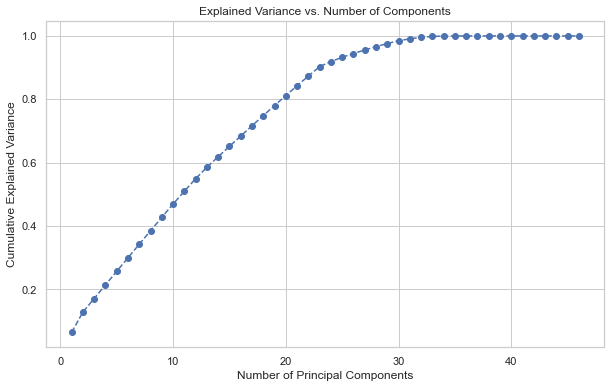

In [80]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

#### When the number of components equals 32, Cumulative explained variance becomes constant. Hence Suitable least number of components equals 32.

In [81]:
pca = PCA(n_components=32)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

### Linear regression for PCA data

In [82]:
model_acc(lr,x_train_pca,y_train,x_test_pca)

MAE: 668.1710525704416
MSE: 746439.6420411954
RMSE: 863.9673848249107


### Lasso for PCA data

In [83]:
model_acc(lasso,x_train_pca,y_train,x_test_pca)

MAE: 668.2637911430777
MSE: 746492.8094833399
RMSE: 863.9981536342192


### Decision tree regression for PCA data

In [84]:
model_acc(dt,x_train_pca,y_train,x_test_pca)

MAE: 921.927625
MSE: 1547216.882775
RMSE: 1243.8717308368255


### xgboost for PCA Data

In [85]:
train_pca_data = xgb.DMatrix(x_train_pca, label=y_train)
test_pca_data = xgb.DMatrix(x_test_pca, label=y_test)

In [86]:
params = {
    'objective': 'reg:squarederror',  # For regression tasks
    'learning_rate': 0.1,  # Step size shrinkage
    'max_depth': 5,  # Maximum depth of a tree
    'alpha': 10,  # L1 regularization term on weights
    'n_estimators': 100  # Number of boosting rounds (trees)
}

In [87]:
model_pca_xgb = xgb.train(params, train_pca_data, num_boost_round=100)

In [88]:
y_pred = model_pca_xgb.predict(test_pca_data)

In [89]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 663.9824452202691
MSE: 739685.0702197434
RMSE: 860.0494580079354


### According to previous results XGBoost is the most suitable model without PCA. So finally I applied xgboost without PCA for the test set. 

In [90]:
test_scaled.shape

(800000, 46)

In [91]:
dtest = xgb.DMatrix(test_scaled)

In [92]:
y_test_pred = model_xgb.predict(dtest)

In [93]:
y_test_pred.shape

(800000,)

In [94]:
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'Premium Amount': y_test_pred
})

In [95]:
submission_df

,id,Premium Amount
0,1200000,1328.038696
1,1200001,1118.386108
2,1200002,1069.212402
3,1200003,1059.157593
4,1200004,1028.287598
...,...,...
799995,1999995,1224.209473
799996,1999996,1408.229736
799997,1999997,1113.754761
799998,1999998,1129.148560


In [97]:
submission_df.to_csv('Submission.csv', index=False)